# Finite volume checks - II

In [1]:
import numpy
from scipy.integrate import quad

import matplotlib.pyplot as plt
%matplotlib notebook

import pyobs

In [2]:
qc = pyobs.qft.finite_volume.quantization_condition_2to2
qcond2 = qc.single_channel(qc.com_frame(), 4, 1)

<IPython.core.display.Javascript object>


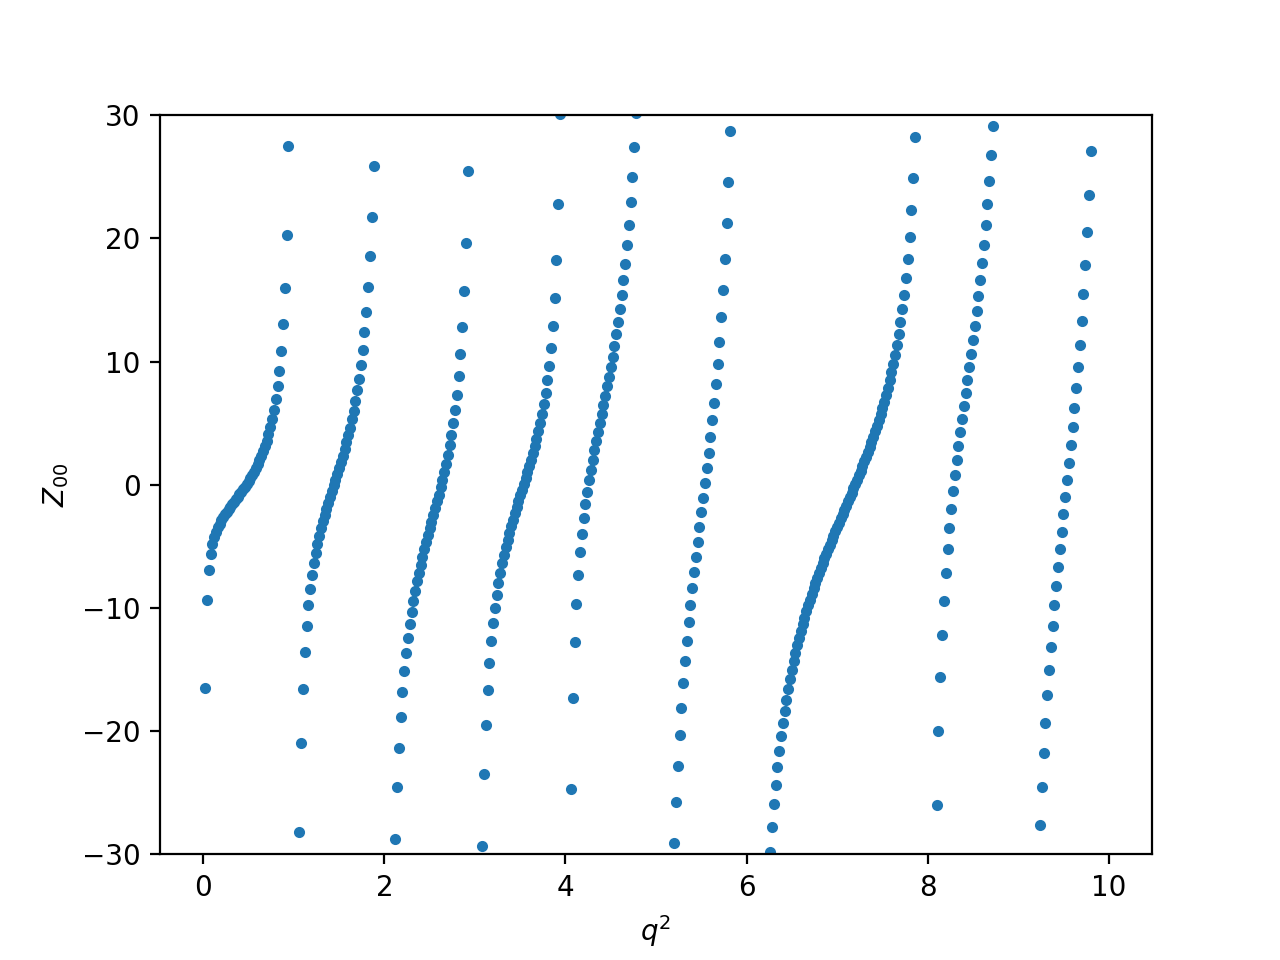

<IPython.core.display.Javascript object>


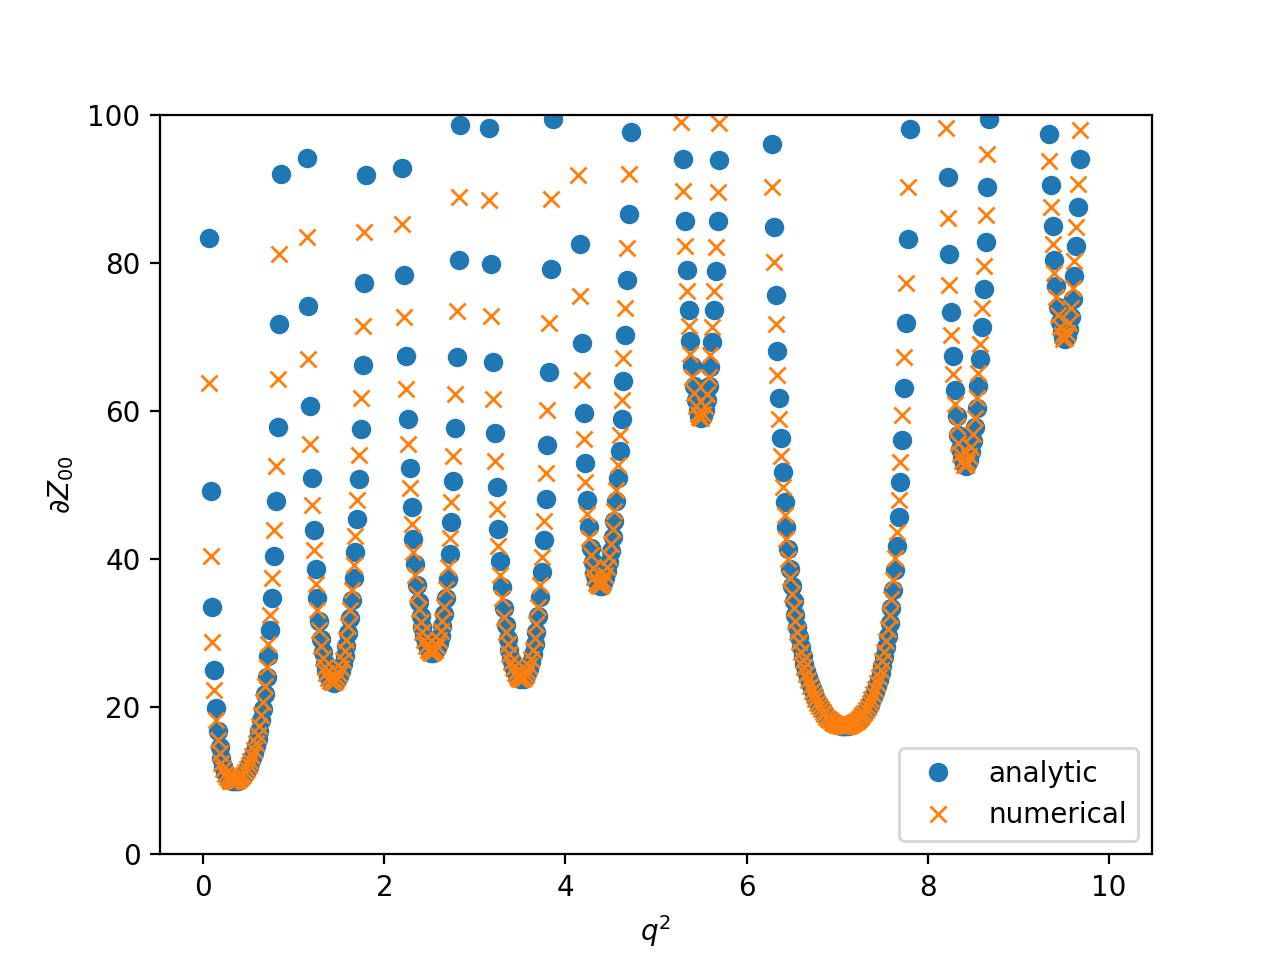

In [3]:
xax=numpy.arange(0,10,0.02)
yax=[qcond2.zeta00(x, 0) for x in xax]

plt.figure()
plt.xlabel('$q^2$')
plt.ylabel('$Z_{00}$')
plt.plot(xax,yax,'.')
plt.ylim(-30,30)

plt.figure()
plt.xlabel('$q^2$')
plt.ylabel('$\partial Z_{00}$')
plt.plot(xax, [qcond2.zeta00(x,1) for x in xax], 'o', label='analytic')
plt.plot(xax[:-1],numpy.diff(yax)/numpy.diff(xax),'x', label='numerical')
plt.ylim(0,100)
plt.legend()

<IPython.core.display.Javascript object>


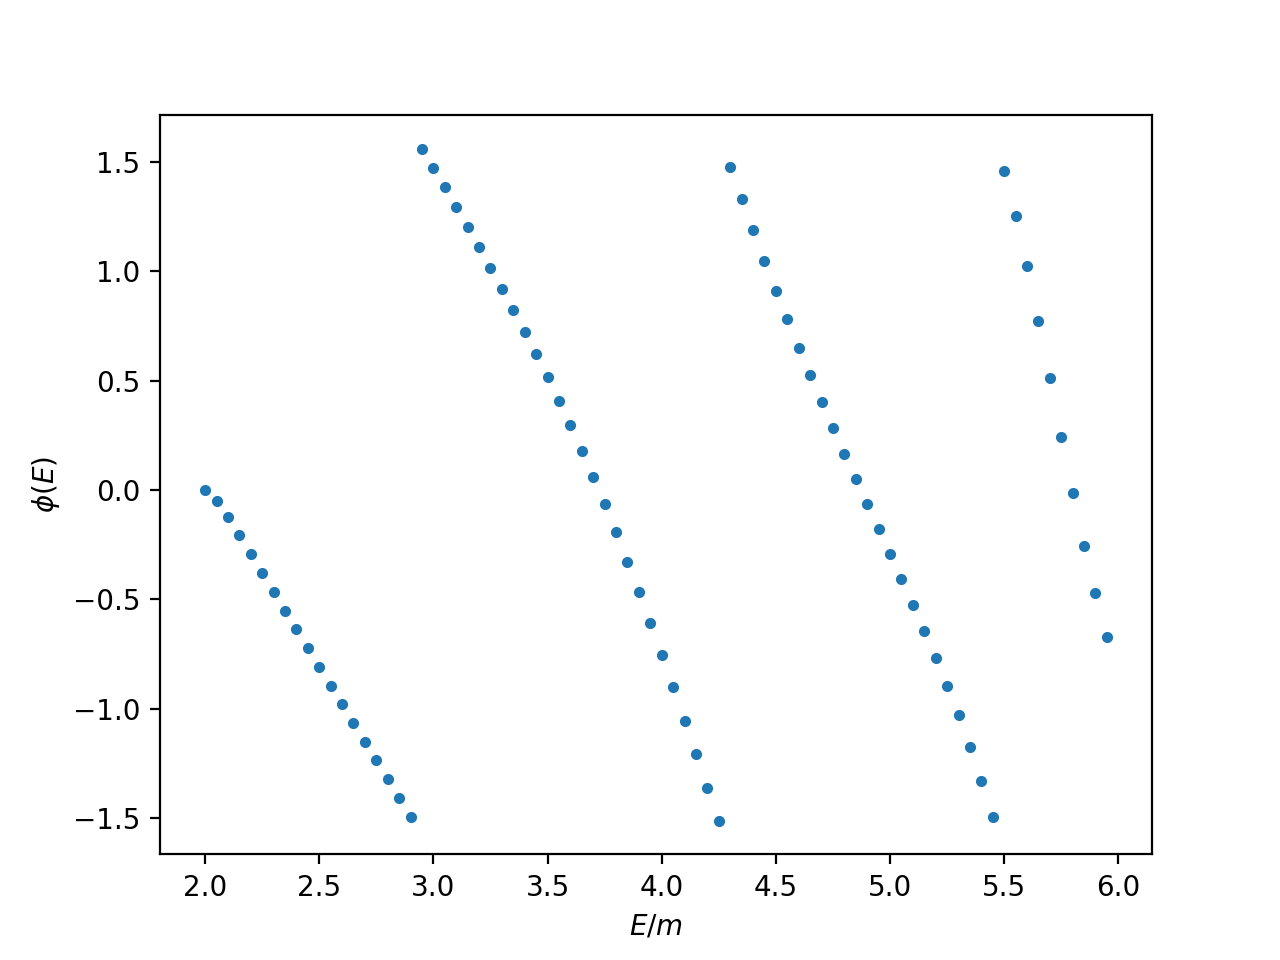

In [4]:
xax=numpy.arange(2.0,6,0.05)
yax=[qcond2.phi(x) for x in xax]

plt.figure()
plt.xlabel('$E/m$')
plt.ylabel('$\phi(E)$')
plt.plot(xax,yax,'.')

In [5]:
yax2 = [yax[0]]

ofs = 0
for i in range(1,len(yax)):
    if (yax[i]>yax[i-1]):
        ofs -= numpy.pi
    yax2 += [ofs + yax[i]]
yax2 = numpy.array(yax2)

<IPython.core.display.Javascript object>


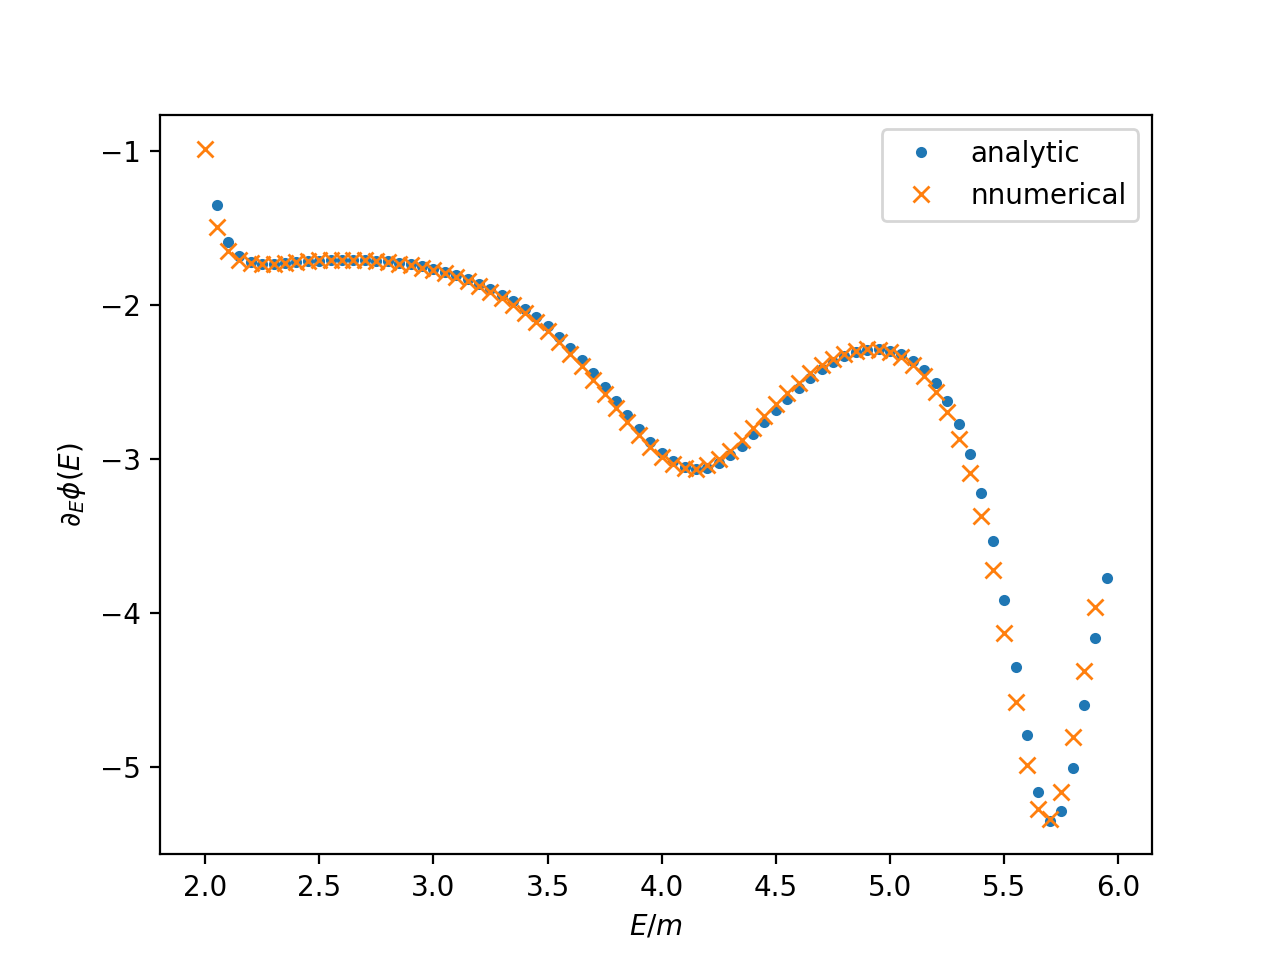

/Users/mbruno/Physics/analysis/pyobs/pyobs/qft/finite_volume/quantization_condition_2to2.py:83: RuntimeWarning: invalid value encountered in double_scalars
  numpy.pi**1.5 * (z00 - 2 * qsq * dz00) / (numpy.pi**3 * qsq + z00**2)


In [6]:
plt.figure()
plt.xlabel('$E/m$')
plt.ylabel('$\partial_E \phi(E)$')
plt.plot(xax, [qcond2.der_phi(x) for x in xax], '.',label='analytic')
plt.plot(xax[:-1], numpy.diff(yax2)/numpy.diff(xax), 'x',label='nnumerical')
plt.legend()

In [7]:
def tandelta(E):
    a = 0.220
    s = E**2
    return (1 - 4/s)**0.5 * a

qcond2.En(tandelta, 1)

In [8]:
en = qcond2.get_energy(tandelta)
for i in range(5):
    print(i, next(en))

0 3.6489138302047914
1 4.787104196726347
2 5.757776341178921
3 6.568781794783458
4 7.224152231759508
